In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("./dataset/weather_dataset_raw.csv")

In [ ]:
print(df)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [ ]:
df=df.drop(["date"],axis=1)

In [ ]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['precipitation'] < lower_bound) | (df['precipitation'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
      precipitation  temp_max  temp_min  wind weather
1              10.9      10.6       2.8   4.5    rain
3              20.3      12.2       5.6   4.7    rain
16              8.1       3.3       0.0   5.6    snow
17             19.8       0.0      -2.8   5.0    snow
18             15.2      -1.1      -2.8   1.6    snow
...             ...       ...       ...   ...     ...
1441           16.0       8.9       5.6   5.6    rain
1446           21.8       6.7       3.9   6.0    rain
1447           18.5       8.9       4.4   5.1    rain
1450           27.4       5.6       2.8   4.3    rain
1456            8.6       4.4       1.7   2.9    rain

[206 rows x 5 columns]


In [ ]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

In [ ]:
df['average_temp'] = (df['temp_max'] + df['temp_min']) / 2

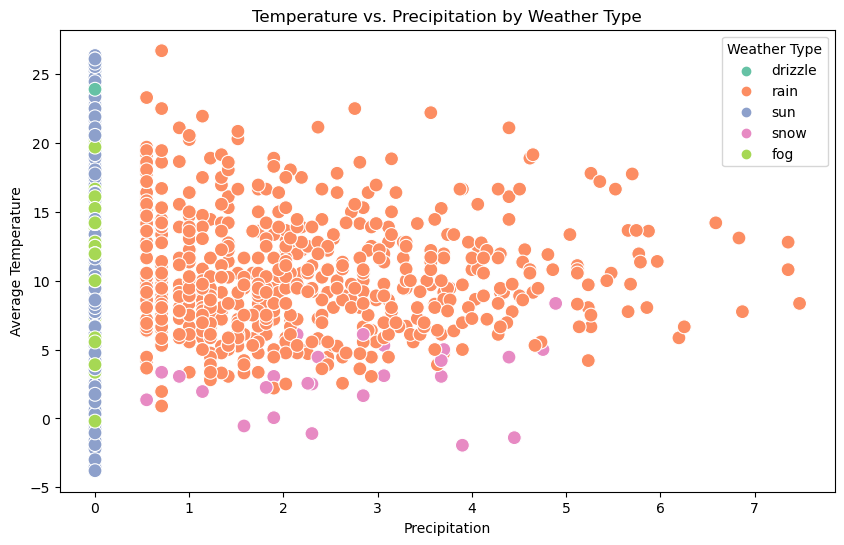

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precipitation', y='average_temp', hue='weather', data=df, palette='Set2', s=100)
plt.xlabel('Precipitation')
plt.ylabel('Average Temperature')
plt.title('Temperature vs. Precipitation by Weather Type')
plt.legend(title='Weather Type', bbox_to_anchor=(1, 1))

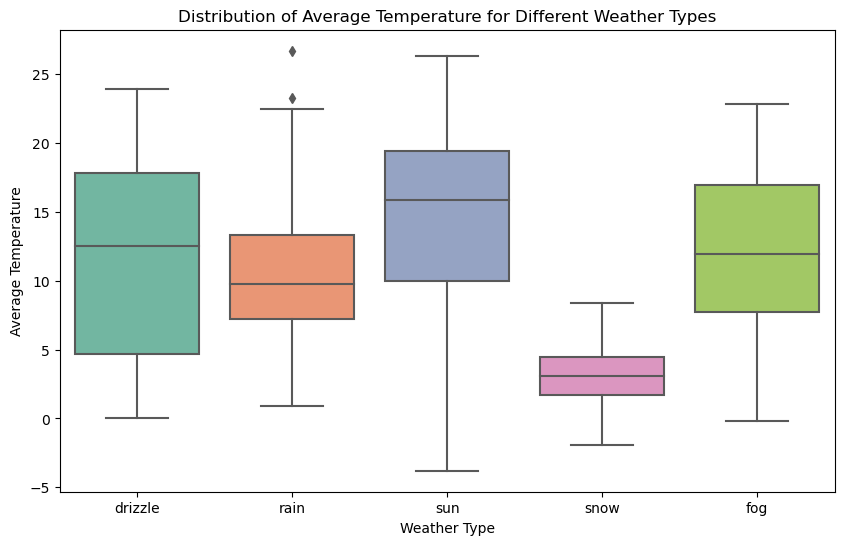

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='average_temp', data=df, palette='Set2')
plt.xlabel('Weather Type')
plt.ylabel('Average Temperature')
plt.title('Distribution of Average Temperature for Different Weather Types')

plt.show()

In [ ]:
#df.to_csv("./dataset/weather_dataset_cleaned.csv", index=False)